In [1]:
import os

In [2]:
len(os.listdir('COVID-19_Radiography_Dataset/COVID/images'))

3616

In [3]:
len(os.listdir('COVID-19_Radiography_Dataset/Normal/images'))

10192

In [4]:
import cv2

In [5]:
img = cv2.imread('COVID-19_Radiography_Dataset/Normal/images/Normal-1.png')

In [6]:
import matplotlib.pyplot as plt


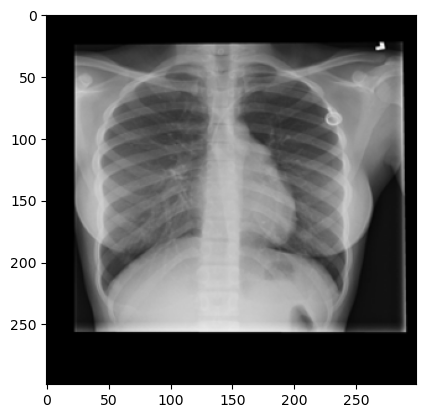

In [7]:
plt.imshow(img)

In [8]:
img.shape

(299, 299, 3)

In [9]:
import pandas as pd
import numpy as np

In [10]:
df = pd.read_excel('COVID-19_Radiography_Dataset/COVID.metadata.xlsx')

In [11]:
df.head()

,FILE NAME,FORMAT,SIZE,URL
0,COVID-1,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
1,COVID-2,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
2,COVID-3,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
3,COVID-4,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
4,COVID-5,PNG,256*256,https://sirm.org/category/senza-categoria/covi...


In [12]:
urls = os.listdir('COVID-19_Radiography_Dataset/COVID/images')

In [13]:
path = "COVID-19_Radiography_Dataset/Covid/images/" +urls[0]

In [14]:
path

'COVID-19_Radiography_Dataset/Covid/images/COVID-1.png'

In [15]:
def loadImages(path, urls, target):
  images = []
  labels = []
  for i in range(len(urls)):
    img_path = path + urls[i]
    img = cv2.imread(img_path)
    img = img / 255.0
    #if we want to resize the images
    img = cv2.resize(img, (50,50) )
    images.append(img)
    labels.append(target)
  images = np.asarray(images)
  return images, labels

In [16]:
covid_path = "COVID-19_Radiography_Dataset/COVID/images/"
covidUrl = os.listdir(covid_path)
covidImages, covidTargets = loadImages(covid_path,covidUrl, 1)

In [17]:
len(covidUrl), len(covidImages)

(3616, 3616)

In [18]:
normal_path = "COVID-19_Radiography_Dataset/Normal/images/"
normalUrl= os.listdir(normal_path)
normalImages, normalTargets = loadImages(normal_path, normalUrl, 0)

In [19]:
covidImages = np.asarray(covidImages)
normalImages = np.asarray(normalImages)

In [20]:
covidImages.shape

(3616, 50, 50, 3)

In [21]:
normalImages.shape

(10192, 50, 50, 3)

In [22]:
#concatenating all covid and normal images into one variable
data = np.r_[covidImages, normalImages]

In [23]:
data.shape

(13808, 50, 50, 3)

In [24]:
target = np.r_[covidTargets, normalTargets]

In [25]:
target.shape

(13808,)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = 0.25)

In [28]:
import tensorflow as tf 


In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [30]:
model = Sequential([
    Conv2D(32, 3, input_shape=(50,50,3), activation ='relu'),
    MaxPool2D(),
    Conv2D(16, 3, activation ='relu'),
    MaxPool2D(),
    Conv2D(16, 3, activation ='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(512, activation = 'relu'),
    Dense(256, activation = 'relu'),
    Dense(128, activation = 'relu'),
    Dense(2, activation='sigmoid')
])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 16)          2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 16)         0

In [32]:
from tensorflow.python import metrics
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
model.fit(x_train, y_train, epochs=15)

Epoch 1/15
324/324 [==============================] - 19s 56ms/step - loss: 0.4641 - accuracy: 0.7831
Epoch 2/15
324/324 [==============================] - 18s 55ms/step - loss: 0.3342 - accuracy: 0.8510
Epoch 3/15
324/324 [==============================] - 17s 53ms/step - loss: 0.2760 - accuracy: 0.8774
Epoch 4/15
324/324 [==============================] - 17s 53ms/step - loss: 0.2444 - accuracy: 0.8947
Epoch 5/15
324/324 [==============================] - 17s 52ms/step - loss: 0.2069 - accuracy: 0.9165
Epoch 6/15
324/324 [==============================] - 17s 51ms/step - loss: 0.1815 - accuracy: 0.9244
Epoch 7/15
324/324 [==============================] - 18s 54ms/step - loss: 0.1647 - accuracy: 0.9320
Epoch 8/15
324/324 [==============================] - 19s 58ms/step - loss: 0.1445 - accuracy: 0.9408
Epoch 9/15
324/324 [==============================] - 17s 53ms/step - loss: 0.1317 - accuracy: 0.9456
Epoch 10/15
324/324 [==============================] - 17s 52ms/step - loss: 0.115

In [34]:
model.evaluate(x_test,y_test)

108/108 [==============================] - 2s 10ms/step - loss: 0.2145 - accuracy: 0.9342


[0.21448484063148499, 0.934240996837616]